## A.  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

### 1.  Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi-square, t-test, or analysis of variance (ANOVA).

Is the monthly charge for internet service related to the churn rate? 

### 2.  Explain how stakeholders in the organization could benefit from an analysis of the data.

It might be that the price of the service is causing customers to end their service or choose another company. For example if a competitor is offering similar services at lower prices it may cause the customer to leave.

### 3.  Identify all of the data in your data set that are relevant to answering your question in part A1.

The relevent data in this case would be MonthlyCharge and Churn to determine the relationship between the monthly charge and the customer's churn values.

## B.  Describe the data analysis by doing the following:

### 1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:
* chi-square

* t-test

* ANOVA

2.  Provide the output and the results of any calculations from the analysis you performed.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
# read in csv data
df = pd.read_csv('C:\\Users\\Freyja\\OneDrive\\Documents\\GitHub\\D207\\D207-Analysis\\churn_clean.csv')

In [3]:
# show head of data
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
churn = df.loc[df['Churn']  == 'Yes', 'MonthlyCharge']
no_churn = df.loc[df['Churn'] == 'No', 'MonthlyCharge']

churn_ttest = stats.ttest_ind(churn, no_churn)
churn_ttest

Ttest_indResult(statistic=40.189476722374266, pvalue=0.0)

Our T-test P-value result above of 0.0 says that the difference between customers with certain monthly charges who churned is significant to those who did not. Due to this, we must reject the null hypothesis that there is no relationship between these two variables and further exploration into the relationship between monthly charge and customer churn is warranted.

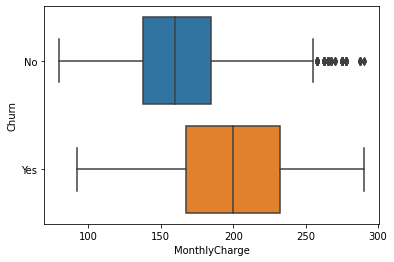

In [97]:
# create boxplot of churn to monthly charge
sns.boxplot(y='Churn',
            x='MonthlyCharge',
            data=df)
plt.show()

We can see in the plot below that customers who churned had a higher mean monthly fee than those who did not.

### 3.  Justify why you chose this analysis technique.

T-tests are used to compare two samples to discover whether there is a significant different in the means, and assumes a normal distribution. We are working with a normal distribution of monthly charges as shown below, and the T-test was able to decide if the difference between the means of the two groups of those who churned with their monthly charge was significantly different to those that did not.

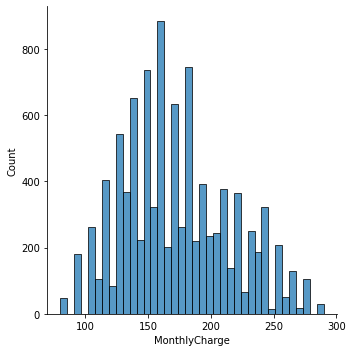

In [99]:
sns.displot(data=df, x='MonthlyCharge')
plt.show()

## C.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

### Continuous Variables

#### Bandwidth_GB_Year

For our continuous variables we will first look at the count of customers compared to their Bandwidth usage in GB per year.

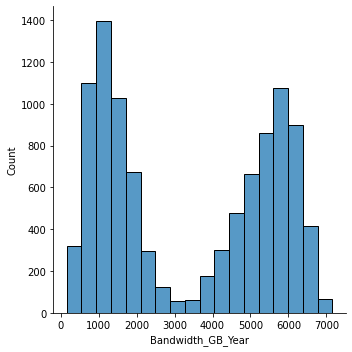

In [79]:
sns.displot(data=df, x='Bandwidth_GB_Year')
plt.show()

We see we have a bimodal distribution of customers compared to their Bandwidth in GB per year with a high peak around 1200 GB and a lower peak at around 5700 GB.

#### Tenure
Next we will look at customer counts in comparison to their tenure.

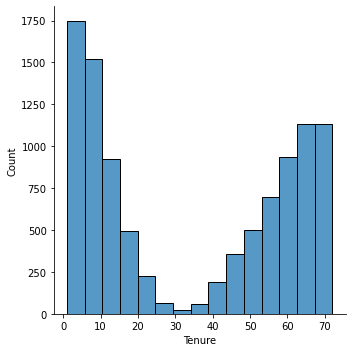

In [5]:
sns.displot(data=df, x='Tenure')
plt.show()

For Tenure, we again have a bimodal distribution with a jump at customers with very little and very high relative tenure.

### Categorical Variables

#### Churn

For our categorical variables we will first look at the Yes/No distribution for customer churn.

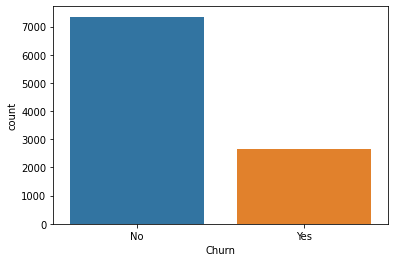

In [74]:
sns.countplot(data=df, x='Churn')
plt.show()

Above we can see than many more customers are staying with the company, than leaving it.

#### Payment Method

Here we will look at the distribution of payment methods amound customers.

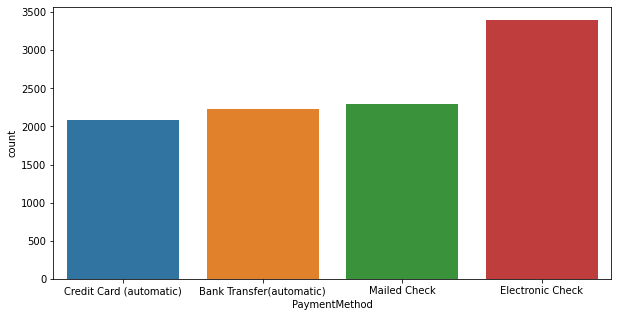

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod')
plt.show()

Above we can see that Electronic Check is the most common payment method for our customers with automatic credit card withdrawals being the leat common.

## D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

### Continuous Variables

#### Children to Bandwidth usage

For our continuous variables we will first observe the relationship between the amount of children in a household and the Bandwidth usage in GB per year.

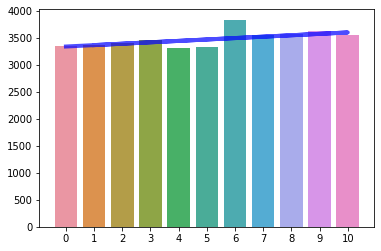

In [137]:
# create a bar graph with line of best fit 
x = np.array(df['Children'].astype(int))
y = np.array(df['Bandwidth_GB_Year'].astype(int))
m, b = np.polyfit(x, y, 1)
sns.barplot(data=df, y=y, x=x, ci=None)
# add a line of best fit to bar
plt.plot(x, m*x + b, color='blue', lw=4, alpha=.7)
plt.show()

We can see above that the bandwidth usage does seem to increase with the number of children in the household, but not terribly dramatically.

#### Monthly Charge to Bandwidth Usage

Next we will look at the relationship between the bandwidth usage and the monthly charge for customers.

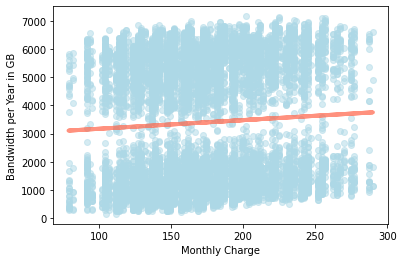

In [143]:
x = np.array(df['MonthlyCharge'].astype(int))
y = np.array(df['Bandwidth_GB_Year'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightblue')
plt.xlabel('Monthly Charge')
plt.ylabel('Bandwidth per Year in GB')
# add a line of best fit to scatterplot
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)
plt.show()

Here again we see that the monthly charge seems to increase slightly with bandwidth usage. There is a gap in the center which mimics our earlier bimodal distribution where there is a gap at around 3000 GB.

### Categorical

#### TechnicalSupport to Churn

In this graph we will look to see if there is a relationship between a customer subscribing to TechSupport and their churn.

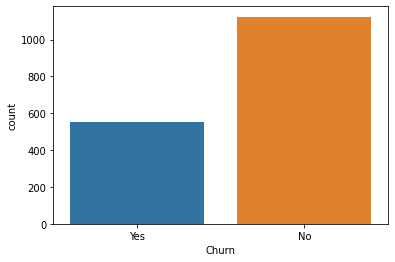

In [121]:
sns.countplot(data=df, x=df.loc[df['TechnicalSupport'] == 'Yes', 'Churn'])
plt.show()

Above we can see that less customers with Tech Support churned. Perhaps having technical support made it so they were less likely to leave the company when they faced technical issues, especially since less of our customers identified as being techie.

#### Churn to Tenure

For this next graph we will be looking at the relationship with churn and tenure.

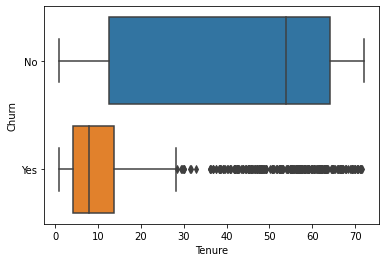

In [146]:
sns.boxplot(y='Churn',
            x='Tenure',
            data=df)

plt.show()

Above we can see that most churns happen in the first 13-14 months with the average customer who leaves ending their relationship with the company at around 8 months.

## E.  Summarize the implications of your data analysis by doing the following:

### 1.  Discuss the results of the hypothesis test.

Our T-test suggested that the relationship between customers churning or not based on their monthly charge is significant, with a P-value of less than .05. Due to this we must reject the null hypothesis that there is no relationship between these two variables, and would do well to explore this relationship further. Our box plot showed us visually that the mean monthly charge of those who churned was a fair amount higher than those who did not.


### 2.  Discuss the limitations of your data analysis.

We are only working with data from 10,000 customers, and the size of this company is unknown, so we do not know the comparison between the amount of customers whose data we have compared to the full population. Additionally, we know that the results of our test was statistically significant, but we do not necessarily know why we have these results. For example, is there another company in the area offering discounted services or special rates for switching, and we would need to find the reasoning for these findings.

### 3.  Recommend a course of action based on your results.

In this case my reccommendation would be to look at competitors and see what they are offering as far as monthly service charges. In the case of internet, it is rare that a person would drop their internet service without seeking another since so many people rely on internet for their daily needs. It is therefore likely that they are switching to another company, and in order to be competitive on the market, an analysis of competitor prices in the market area should be performed. There may be other factors though, such as the type of internet the customers are getting for the price and the Bandwidth they are using compared to their monthly charges that could play a role. The relationship between monthly charge, churn and these factors would thus also be warranted.

## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used. 

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d1f1f5fb-da29-44bb-90af-add70170be2b

## G.  Reference the web sources used to acquire segments of third-party code to support the analysis. 

The code was my own and used from various past projects.

## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

“Scipy.stats.ttest_ind¶.” Scipy.stats.ttest_ind - SciPy v1.7.1 Manual, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html. 